In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_path = "/content/drive/MyDrive/Data"


In [ ]:
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


In [ ]:
img_height, img_width = 254, 254
batch_size = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(
           train_path,
           subset="training",
           validation_split=0.3,
           seed=123,
           label_mode = 'categorical',
           image_size = (img_height, img_width),
            batch_size = batch_size
)


Found 1016 files belonging to 2 classes.
Using 712 files for training.


In [ ]:
img_height, img_width = 254, 254
batch_size = 32
test_data = tf.keras.preprocessing.image_dataset_from_directory(
           train_path,
           subset="validation",
           validation_split=0.3,
           seed=123,
           label_mode = 'categorical',
           image_size = (img_height, img_width),
            batch_size = batch_size
)

Found 1016 files belonging to 2 classes.
Using 304 files for validation.


In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2,activation='sigmoid')
])
   

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 254, 254, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)       

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
result = model.fit(
           train_data,
           validation_data = test_data,
           epochs= 10
)

Epoch 1/10
23/23 [==============================] - 6s 141ms/step - loss: 0.8338 - accuracy: 0.6278 - val_loss: 0.5190 - val_accuracy: 0.8059
Epoch 2/10
23/23 [==============================] - 4s 126ms/step - loss: 0.4274 - accuracy: 0.8146 - val_loss: 0.3717 - val_accuracy: 0.8487
Epoch 3/10
23/23 [==============================] - 3s 122ms/step - loss: 0.3329 - accuracy: 0.8722 - val_loss: 1.0167 - val_accuracy: 0.7072
Epoch 4/10
23/23 [==============================] - 3s 123ms/step - loss: 0.3716 - accuracy: 0.8694 - val_loss: 0.3108 - val_accuracy: 0.8717
Epoch 5/10
23/23 [==============================] - 4s 161ms/step - loss: 0.2792 - accuracy: 0.8834 - val_loss: 0.2789 - val_accuracy: 0.8849
Epoch 6/10
23/23 [==============================] - 3s 122ms/step - loss: 0.2166 - accuracy: 0.9242 - val_loss: 0.2647 - val_accuracy: 0.8849
Epoch 7/10
23/23 [==============================] - 3s 124ms/step - loss: 0.1782 - accuracy: 0.9340 - val_loss: 0.3401 - val_accuracy: 0.8487
Epoch 

In [ ]:
import matplotlib.pyplot as plt


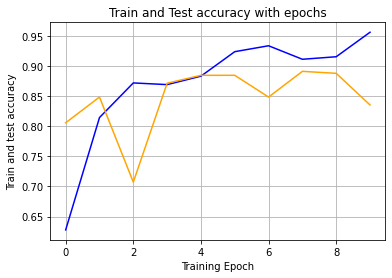

In [ ]:
plt.plot(result.history['accuracy'], color='blue', label='train')
plt.plot(result.history['val_accuracy'], color ='orange', label='train')
plt.grid(True)
plt.title("Train and Test accuracy with epochs")
plt.xlabel("Training Epoch")
plt.ylabel("Train and test accuracy")
plt.show()

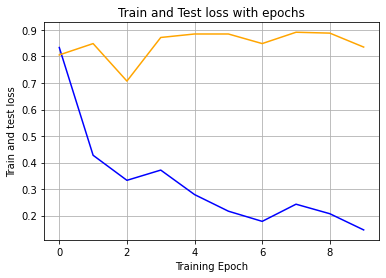

In [ ]:
plt.plot(result.history['loss'], color='blue', label='train')
plt.plot(result.history['val_accuracy'], color ='orange', label='train')
plt.grid(True)
plt.title("Train and Test loss with epochs")
plt.xlabel("Training Epoch")
plt.ylabel("Train and test loss")
plt.show()